## CLASSIFICATION OF DATES FRUIT.
Creating a model of that can predict the particular type of a date fruit based on the visual features extracted from the image which will be generated from a computer vision system.

Two models were used in the project: K nearest neighbor and random forest.
We got our dataset from kaggle.com.

### Group members
Zainab Ibraheem

Opegbemi Matthias Busoye

Emmanuel Okororie

Mumini Adamu

## A brief introduction about our dataset
Date fruit (Phoenix dactylifera), which has about 200 types and more than 2500 species worldwide, is an edible and a nutritive fruit, according to S. Khalid et al. Date fruit can be classified by evaluating with image analysis and pattern recognition techniques. The differences in view, distance, and lighting exposure are the obstacles encountered in terms of performing a reliable classification. Therefore, the studies on fruit recognition and classification have been carried out based on the visual features extracted from images.

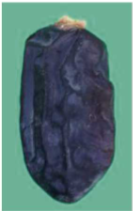

## Image aquisition
In this study, the classification process was performed for 7 different date fruit types, that are, Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai. Barhee 65, Deglet Nour 98, Sukkary 204, Rotab Mozafati 72, Ruthana 166, Safawi 199, and Sagai 94 samples were used from palm varieties, respectively.
A CVS was set up for the image acquisition and captured images of the date fruits were transferred to the computer environment. The camera used in the setup is placed on a closed box with an LED light system. The future robot S100 series smart camera used to capture images has a resolution of 1280 × 1024. This camera, which has a CMOS-type 1.3 MP sensor, captures 90 FPS images in order to quickly take images in the installed conveyor system.
Green color is used in the background in order to easily distinguish the palm image from the background. RGB values of green color were determined as R = 106, G = 210, and B = 175. Using these color values, the image was color filtered, and the date fruit image was obtained without a background.

## Image Processing and Extraction of Morphological Features
The obtained images were converted into grayscale and binary images for feature extraction. Basically, the operations were performed on methodologies of threshold and pixel information. At the end of the image processing, each date fruit was examined separately, and a set of features were extracted from them. The Otsu method, one of the commonly used image thresholding techniques, was used within the scope of the study. Generally working on gray level images, the method only checks how many times each color is present on the image. Therefore, the color distributions of the images are first calculated, and then, all processes are performed on this distribution sequence.

## Date Fruit Features Dataset
The date fruit types selected to be examined in the study are Barhee from the Palestinian region, Deglet Nour from the Algeria region, Sukkary, Safawi, Sagai, and Ruthana from the Saudi Arabia Riyadh and Medina region, and Rotab Mozafati from the Iran region. These selected date fruits are the most common and frequently grown types in their region of belonging. Table 2 provides the general characteristics of the date fruit types used in the study, while Table 3 provides places to statistical averages of the features obtained from the date fruits.

## Why did we choose this dataset.
We wanted to choose a project which allowed us work with CVS and image processing, but with the current lack of knowlegbe in this field, this dataset already handled the image acquisition and image processing aspect of the project, which gives the chance to focus on just the machine learning aspect of the poroject.

#### This can also be extend to fruit and object classification with more studies which would largely reduce production time for products with involves fruits seperation. Also, it would shorten process from production to consumption stage and increase productivity in the agricultural sector, which Nigeria is.


This is a classification problem since we are trying to predict caterigorical labels and not continuous values which is a regression problem.

### importing all required modules for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Reading the dataset and spliting the data(X) from the target(y)

In [2]:
date_fruit = pd.read_excel("Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")
date_fruit_array = np.array(date_fruit)
date_fruit_data = date_fruit_array[:,:-2]
date_fruit_target = date_fruit_array[:,-1]

## Snippet of the dataset

In [3]:
date_fruit.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.2287 -59191263232 -50714214400 -39922372608     58.7255     54.9554   
1      3.1704 -34233065472 -37462601728 -31477794816     50.0259     52.8168   
2      4.7192 -93948354560 -74738221056 -60311207936     65.4772     59.2860   
3      8.2618 -32074307584 -32060925952 -29575010304     43.3900     44.1259   
4      4.4146 -39980974080 -35980042240 -25593278464     52.7743     50.9080   

   ALLdaub4RB  Class  
0     47.8400  BERHI  
1     47.8315  BERHI  
2     51.9378  BERHI  
3     41.1882  BERHI  
4     42.6666  BERHI  

[5 rows x 35 columns]

## Information about our dataset

In [4]:
print(date_fruit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

## More description about our dataset for better understanding of how it is distributed

In [240]:
print(date_fruit.describe().transpose())

               count          mean           std           min           25%  \
AREA           898.0  2.982952e+05  1.072452e+05  1.987000e+03  2.069480e+05   
PERIMETER      898.0  2.057661e+03  4.100125e+02  9.118280e+02  1.726091e+03   
MAJOR_AXIS     898.0  7.508120e+02  1.440593e+02  3.367227e+02  6.410686e+02   
MINOR_AXIS     898.0  4.958728e+02  1.142689e+02  2.283200e+00  4.046844e+02   
ECCENTRICITY   898.0  7.374678e-01  8.872739e-02  3.448000e-01  6.856250e-01   
EQDIASQ        898.0  6.045779e+02  1.195939e+02  5.029840e+01  5.133171e+02   
SOLIDITY       898.0  9.818403e-01  1.815742e-02  8.366000e-01  9.788250e-01   
CONVEX_AREA    898.0  3.038456e+05  1.088157e+05  2.257000e+03  2.100228e+05   
EXTENT         898.0  7.362671e-01  5.374518e-02  5.123000e-01  7.058750e-01   
ASPECT_RATIO   898.0  2.131102e+00  1.782078e+01  1.065300e+00  1.373725e+00   
ROUNDNESS      898.0  8.577200e-01  7.083882e-02  4.800000e-03  8.277500e-01   
COMPACTNESS    898.0  8.071903e-01  6.21

## Checking if our data is already clean
checking for null values in the dataset, which we found there to be none.

In [81]:
date_fruit.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

### There were no null value present in the dataset

## A bar plot showing the distribution of our dates fruit type

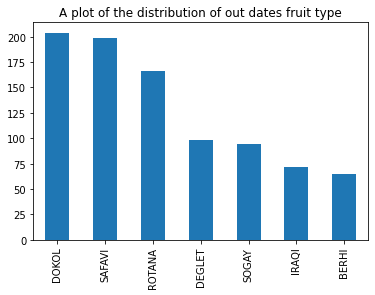

In [249]:
fig = plt.figure()
date_fruit['Class'].value_counts().plot.bar()
date_fruit['Class'].value_counts()
plt.title("A plot of the distribution of out dates fruit type")
plt.show()

In [85]:
date_fruit.corr()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
AREA           1.000000   0.956494    0.878893    0.954899     -0.370303   
PERIMETER      0.956494   1.000000    0.960734    0.859990     -0.166816   
MAJOR_AXIS     0.878893   0.960734    1.000000    0.721133      0.063090   
MINOR_AXIS     0.954899   0.859990    0.721133    1.000000     -0.607120   
ECCENTRICITY  -0.370303  -0.166816    0.063090   -0.607120      1.000000   
EQDIASQ        0.993243   0.959938    0.886277    0.948006     -0.335085   
SOLIDITY       0.027371  -0.133857   -0.166982    0.059613     -0.220434   
CONVEX_AREA    0.998886   0.963489    0.886948    0.951470     -0.356565   
EXTENT        -0.086286  -0.214632   -0.279951    0.028003     -0.342775   
ASPECT_RATIO  -0.095342   0.018308    0.111631   -0.150407      0.110238   
ROUNDNESS      0.044346  -0.235744   -0.355258    0.243655     -0.659626   
COMPACTNESS    0.315197   0.078554   -0.164403    0.551966     -0.917470   
SHAPEFACTOR_1 -0.124025  -0.011718    0.081976   -0.176214      0.114084   
SHAPEFACTOR_2 -0.861870  -0.934379   -0.959569   -0.736051     -0.026945   
SHAPEFACTOR_3  0.332349   0.103959   -0.136056    0.572201     -0.967224   
SHAPEFACTOR_4  0.039321  -0.036744   -0.048096   -0.004244     -0.020083   
MeanRR        -0.353447  -0.451033   -0.530236   -0.196257     -0.252334   
MeanRG        -0.380730  -0.468553   -0.538479   -0.231831     -0.238878   
MeanRB        -0.376241  -0.448371   -0.506743   -0.246280     -0.180566   
StdDevRR      -0.320764  -0.386137   -0.442289   -0.196623     -0.142801   
StdDevRG      -0.172480  -0.201908   -0.248626   -0.077724     -0.097034   
StdDevRB      -0.048223  -0.176466   -0.284034    0.095411     -0.393799   
SkewRR         0.376400   0.488147    0.551523    0.229831      0.223854   
SkewRG         0.401733   0.484734    0.550014    0.259649      0.184643   
SkewRB         0.433323   0.415364    0.412055    0.396219     -0.177619   
KurtosisRR     0.218253   0.313334    0.366579    0.093267      0.215284   
KurtosisRG     0.326335   0.398168    0.460468    0.189532      0.194135   
KurtosisRB     0.381096   0.364269    0.347940    0.354742     -0.179358   
EntropyRR     -0.359332  -0.266206   -0.146311   -0.466776      0.431537   
EntropyRG     -0.393124  -0.294308   -0.167972   -0.501442      0.463969   
EntropyRB     -0.506256  -0.416802   -0.297395   -0.585234      0.442189   
ALLdaub4RR    -0.353446  -0.451028   -0.530231   -0.196256     -0.252331   
ALLdaub4RG    -0.380747  -0.468571   -0.538497   -0.231847     -0.238875   
ALLdaub4RB    -0.376277  -0.448409   -0.506782   -0.246312     -0.180563   

                EQDIASQ  SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...  \
AREA           0.993243  0.027371     0.998886 -0.086286     -0.095342  ...   
PERIMETER      0.959938 -0.133857     0.963489 -0.214632      0.018308  ...   
MAJOR_AXIS     0.886277 -0.166982     0.886948 -0.279951      0.111631  ...   
MINOR_AXIS     0.948006  0.059613     0.951470  0.028003     -0.150407  ...   
ECCENTRICITY  -0.335085 -0.220434    -0.356565 -0.342775      0.110238  ...   
EQDIASQ        1.000000  0.018777     0.993397 -0.112353     -0.157370  ...   
SOLIDITY       0.018777  1.000000    -0.016449  0.392552     -0.189234  ...   
CONVEX_AREA    0.993397 -0.016449     1.000000 -0.107403     -0.095457  ...   
EXTENT        -0.112353  0.392552    -0.107403  1.000000      0.067207  ...   
ASPECT_RATIO  -0.157370 -0.189234    -0.095457  0.067207      1.000000  ...   
ROUNDNESS      0.035564  0.611010     0.015083  0.470357     -0.410407  ...   
COMPACTNESS    0.301535  0.384826     0.297794  0.365187     -0.422474  ...   
SHAPEFACTOR_1 -0.186715 -0.188307    -0.124221  0.072829      0.999515  ...   
SHAPEFACTOR_2 -0.887398  0.047237    -0.865527  0.216175     -0.055882  ...   
SHAPEFACTOR_3  0.304564  0.367759     0.313861  0.394855     -0.243065  ...   
SHAPEFACTOR_4  0.037291  0.874596     0.005152  0.229890     -0.134463  ...   
MeanRR        -

## Encoding the classes with values from 0 to 6

In [9]:
label_encoder=LabelEncoder()
label_encoder.fit(date_fruit_target)
date_fruit_target_label=label_encoder.transform(date_fruit_target)
classes=label_encoder.classes_
classes, np.array(range(len(classes)))


(array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
       dtype=object),
 array([0, 1, 2, 3, 4, 5, 6]))

## Splitting the datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(date_fruit_data, date_fruit_target,
                                                    test_size=0.25, random_state=25)

In [ ]:
column_dict = {}
for index, column in enumerate(np.array(date_fruit.columns)):
    if column != "Class": column_dict[column] = index
column_dict

In [5]:
class_dict = {}
colors = ['r', 'b', 'g', 'y', 'm', 'c', 'k']
for index, class_ in enumerate(classes):
    class_dict[class_] = colors[index]+'.'
class_dict

NameError: name 'classes' is not defined

## USING K NEAREST NEIGHBOR  TO MODEL OUR DATASET
Creating, training and scoring our model.

We chose to start with knn because it is a simple model to use and understand.

## Trying for different value of k from 1, 100 and creating a plot of the score against k

Max accuracy = 0.71, the corresponding k value = 19


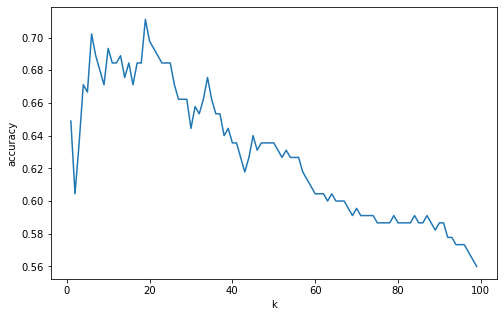

In [5]:
k_range = range(1,100); acc_array = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k); knn_model.fit(X_train, y_train)
    acc_array.append(knn_model.score(X_test, y_test))
max_score, K_max_score = np.array(acc_array).max() ,np.array(acc_array).argmax() + 1
print(f"Max accuracy = {max_score:.2f}, the corresponding k value = {K_max_score}")
fig, ax = plt.subplots(1, 1, figsize=(8,5)); ax.plot(k_range, acc_array, label="sklearn")
ax.set_xlabel("k"); ax.set_ylabel("accuracy"); plt.show()

## Predicting and plotting our confusion matrix 

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=K_max_score)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.7111111111111111

In [7]:
con_matrix = confusion_matrix(knn_model.predict(X_test), y_test)
class_report = classification_report(knn_model.predict(X_test), y_test)
print(f"score {knn_model.score(X_test, y_test)}")
print(con_matrix)
print(class_report)

score 0.7111111111111111
[[ 4  0  2  0  0  0  2]
 [ 2  9  1  2  3  1  4]
 [ 4 13 46  2  0  2  7]
 [ 4  1  0  7  0  0  0]
 [ 2  4  0  1 30  0  1]
 [ 0  0  2  3  0 51  1]
 [ 0  1  0  0  0  0 13]]
              precision    recall  f1-score   support

       BERHI       0.25      0.50      0.33         8
      DEGLET       0.32      0.41      0.36        22
       DOKOL       0.90      0.62      0.74        74
       IRAQI       0.47      0.58      0.52        12
      ROTANA       0.91      0.79      0.85        38
      SAFAVI       0.94      0.89      0.92        57
       SOGAY       0.46      0.93      0.62        14

    accuracy                           0.71       225
   macro avg       0.61      0.68      0.62       225
weighted avg       0.78      0.71      0.73       225



## confusion matrix

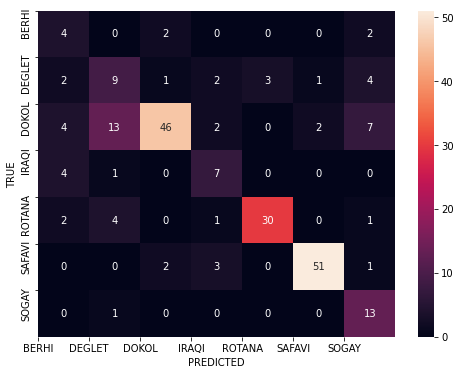

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(con_matrix, annot=True)
ax.set_yticks(range(len(classes))); ax.set_yticklabels(classes); ax.set_ylabel("TRUE")
ax.set_xticks(range(len(classes))); ax.set_xticklabels(classes); ax.set_xlabel("PREDICTED")
plt.show()

   ## USING RANDOM FOREST TO MODEL OUR DATASET 
 Creating, training(fit) and scoring our model
 
 We decided on using random forest which works best with datasets with large number of features and it can also handle large dataset with high dimensionality.

In [371]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
con_matrix = confusion_matrix(rf_model.predict(X_test), y_test)
class_report = classification_report(rf_model.predict(X_test), y_test)
print(f"score {rf_model.score(X_test, y_test)}")
print(con_matrix); print(class_report)

score 0.8666666666666667
[[13  0  0  0  0  0  0]
 [ 0 13  4  0  0  0  3]
 [ 0  7 46  0  0  0  0]
 [ 3  0  0 15  0  0  0]
 [ 0  1  0  0 31  0  0]
 [ 0  1  0  0  0 52  0]
 [ 0  6  1  0  2  2 25]]
              precision    recall  f1-score   support

       BERHI       0.81      1.00      0.90        13
      DEGLET       0.46      0.65      0.54        20
       DOKOL       0.90      0.87      0.88        53
       IRAQI       1.00      0.83      0.91        18
      ROTANA       0.94      0.97      0.95        32
      SAFAVI       0.96      0.98      0.97        53
       SOGAY       0.89      0.69      0.78        36

    accuracy                           0.87       225
   macro avg       0.85      0.86      0.85       225
weighted avg       0.88      0.87      0.87       225



## Confusion matrix

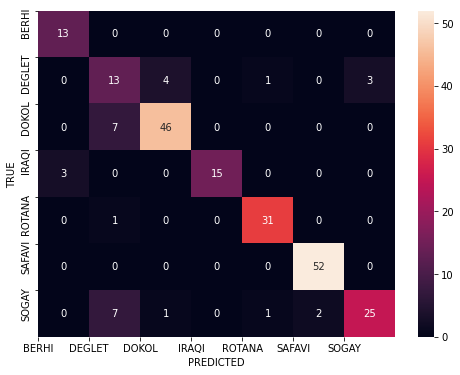

In [360]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(con_matrix, annot=True)
ax.set_yticks(range(len(classes))); ax.set_yticklabels(classes); ax.set_ylabel("TRUE")
ax.set_xticks(range(len(classes))); ax.set_xticklabels(classes); ax.set_xlabel("PREDICTED")
plt.show()

## Features importance

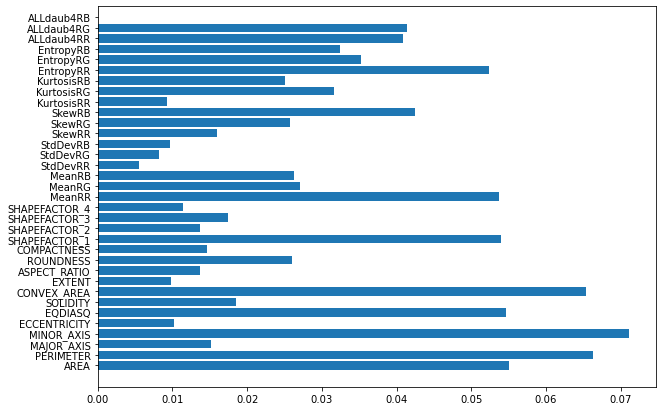

In [361]:
importances = rf_best_model.feature_importances_
fig, ax =plt.subplots(1,1,figsize=(10,7))
ax.barh(range(33),importances)
ax.set_yticks(range(len(column_dict))); ax.set_yticklabels(column_dict.keys())
plt.show()

## A plot of the 2 most important features against eachother, PERIMETER against MINOR_AXIS

In [ ]:




fig, ax = plt.subplots(1, 1, figsize=(10,5))
for class_ in class_dict:
    pos = np.where(date_fruit_target == class_)[0]
    ax.plot(date_fruit_data[pos,column_dict["MINOR_AXIS"]], date_fruit_data[pos,column_dict["PERIMETER"]],
             class_dict[class_], label=class_)
ax.set_xlabel("MINOR_AXIS"); ax.set_ylabel("PERIMETER")
ax.set_title("A plot of the 2 most important feature against eachother, PERIMETER against MINOR_AXIS")
fig.legend(); plt.show()

## Trying to get the best parameters for the model using Gridsearch

In [343]:
n_estimators = [i for i in range(10, 100, 5)] # The number of trees in the forest.
criterion = ["gini", "entropy"] # The function to measure the quality of a split.
max_depth = [None, 2, 4] # The maximum depth of the tree
min_samples_leaf = [1, 2] # The minimum number of samples required to be at a leaf node
max_features = ["sqrt", "auto"] # The number of features to consider when looking for the best split:
bootstrap = [True, False] # Whether bootstrap samples are used when building trees.

param_grid ={
    "n_estimators" : n_estimators,
    "criterion" : criterion,
    "max_depth" : max_depth,
    "min_samples_leaf" : min_samples_leaf,
    "max_features" : max_features,
    "bootstrap" : bootstrap,
}

## The best parameters I got.

In [344]:
rf_moodel = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf_moodel, param_grid=param_grid)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 90}

## Modelling with the gotten parameters.

In [376]:
rf_best_model = RandomForestClassifier(n_estimators=90, bootstrap=False, criterion="gini",
                                       max_features='sqrt', max_depth=None, min_samples_leaf=1)
rf_best_model.fit(X_train, y_train)
con_matrix = confusion_matrix(rf_best_model.predict(X_test), y_test)
class_report = classification_report(rf_best_model.predict(X_test), y_test)
print(f"score {rf_best_model.score(X_test, y_test):.2f}")
print(con_matrix); print(class_report)

score 0.88
[[14  0  0  0  0  0  0]
 [ 0 14  4  0  1  0  3]
 [ 0  6 46  0  0  0  0]
 [ 2  0  0 15  0  0  0]
 [ 0  0  0  0 31  0  0]
 [ 0  0  0  0  0 52  0]
 [ 0  8  1  0  1  2 25]]
              precision    recall  f1-score   support

       BERHI       0.88      1.00      0.93        14
      DEGLET       0.50      0.64      0.56        22
       DOKOL       0.90      0.88      0.89        52
       IRAQI       1.00      0.88      0.94        17
      ROTANA       0.94      1.00      0.97        31
      SAFAVI       0.96      1.00      0.98        52
       SOGAY       0.89      0.68      0.77        37

    accuracy                           0.88       225
   macro avg       0.87      0.87      0.86       225
weighted avg       0.89      0.88      0.88       225



## Confusion matrix.

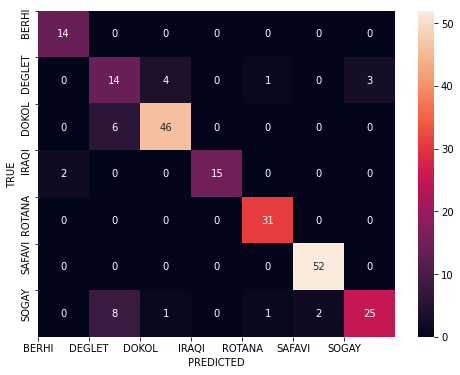

In [377]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(con_matrix, annot=True)
ax.set_yticks(range(len(classes))); ax.set_yticklabels(classes); ax.set_ylabel("TRUE")
ax.set_xticks(range(len(classes))); ax.set_xticklabels(classes); ax.set_xlabel("PREDICTED")
plt.show()

## LOGISTIC REGRESSION

In [21]:
model = LogisticRegression().fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_test, y_test, scoring='accuracy')
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Mean Accuracy: 0.560 (0.062)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
model.score(X_test, y_test)

0.5688888888888889

In [34]:
date_fruit_target
class_dict

{'BERHI': 'r.',
 'DEGLET': 'b.',
 'DOKOL': 'g.',
 'IRAQI': 'y.',
 'ROTANA': 'm.',
 'SAFAVI': 'c.',
 'SOGAY': 'k.'}

In [38]:
class_index_dict = {}
for class_ in class_dict:
    class_index_dict[class_] = date_fruit_target == class_
    
class_index_dict

{'BERHI': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, Fals

<ipython-input-63-63eaf93e9497>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


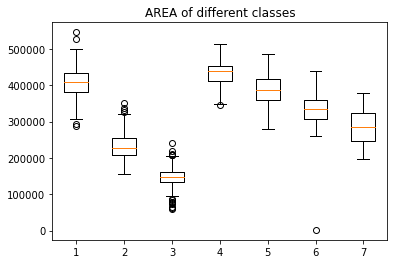

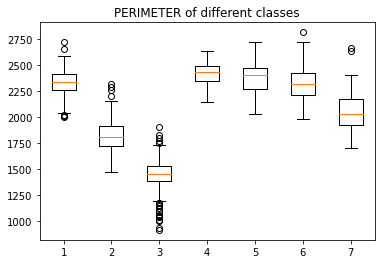

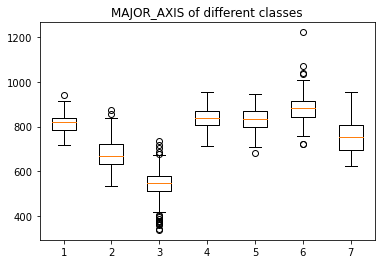

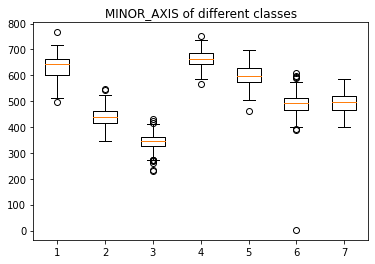

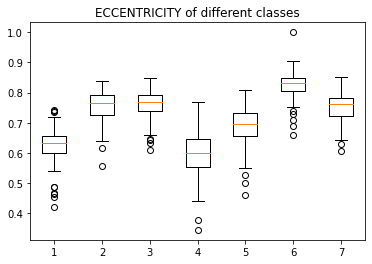

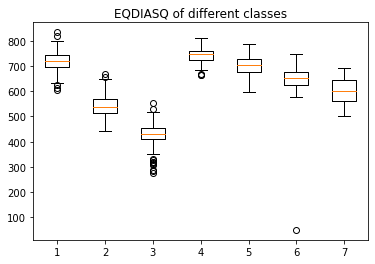

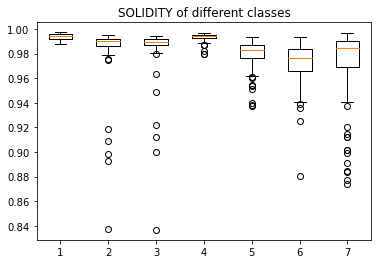

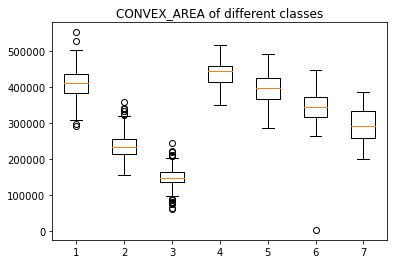

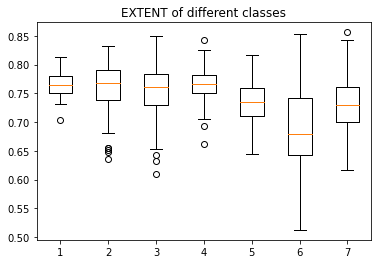

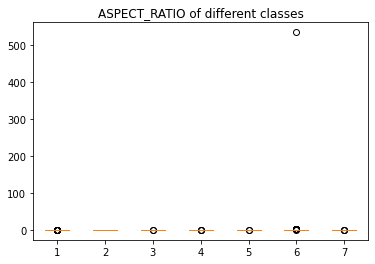

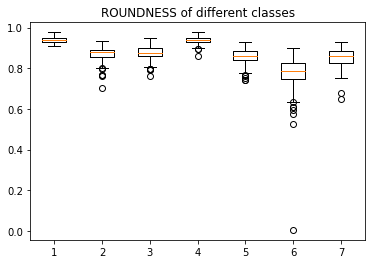

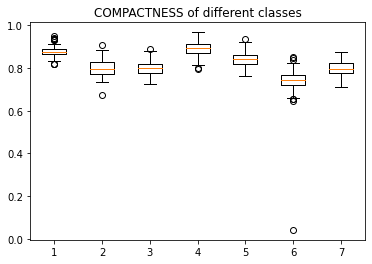

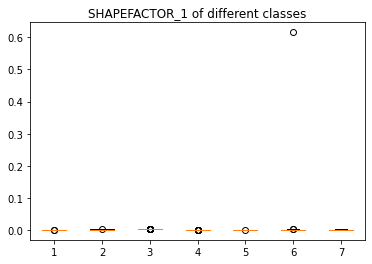

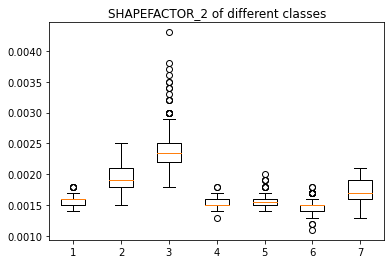

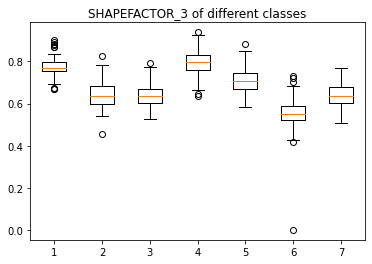

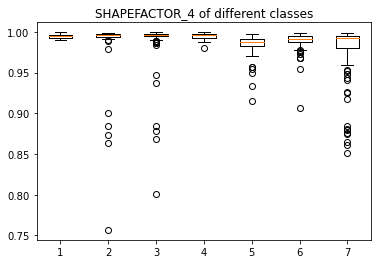

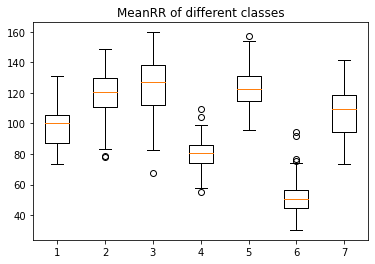

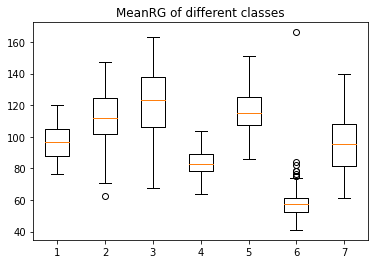

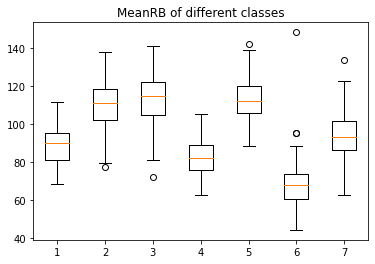

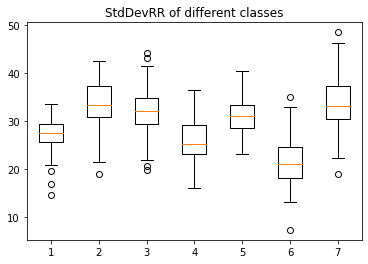

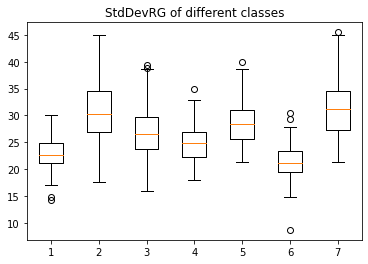

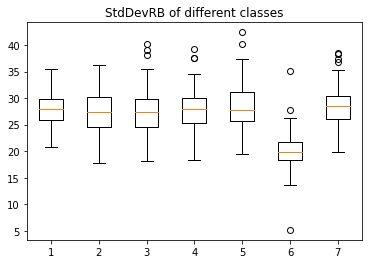

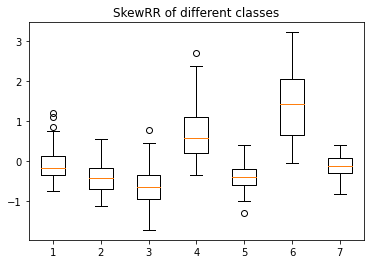

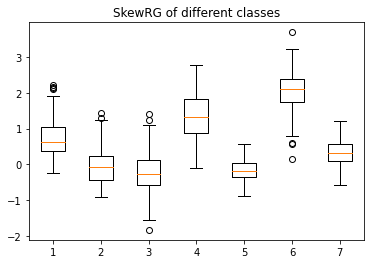

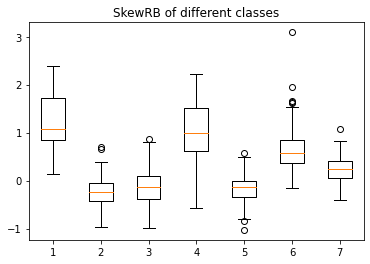

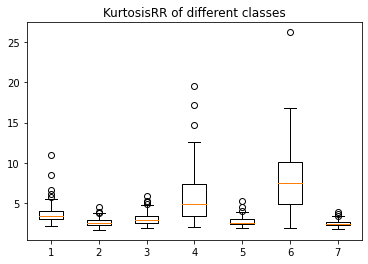

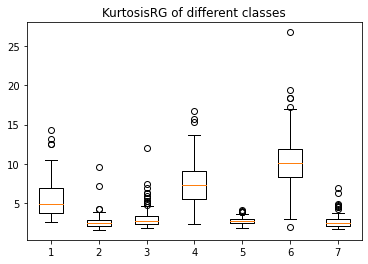

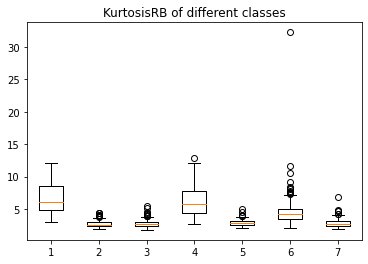

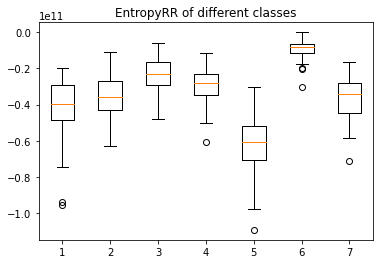

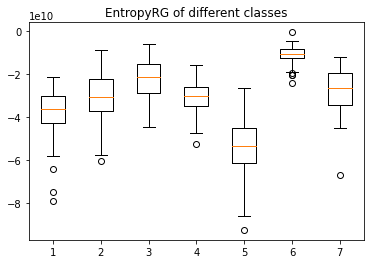

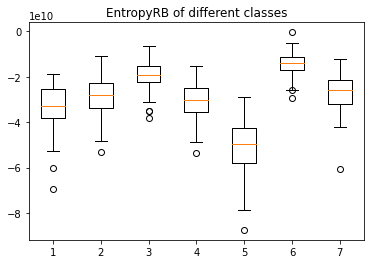

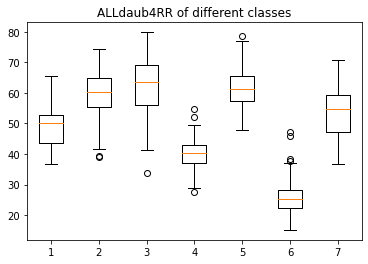

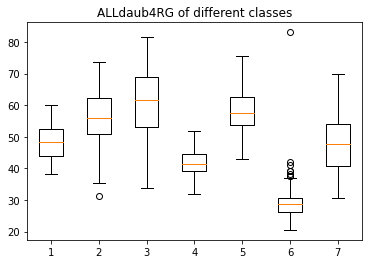

In [63]:
for column_index in range(len(column_dict)-2):
    plt.figure()
    plt.boxplot([date_fruit_data[class_index_dict[class_],column_index] for class_ in class_dict])
    plt.title(list(column_dict.keys())[column_index] + " of different classes")
    # plt.xlabel(range(len(class_dict)))
    # plt.xticks(class_dict.keys())
plt.show()

## CONCLUSION
According to the confusion matrix, Safawi is the date fruit with the highest classification success for all models whike Barhee id th model with the lowest cLassificaton success.
The features that contributed the most in the classification model are minor axis, perimeter and convex area. 

This project shows we can use machine learning for classification of fruits and can be extended to image recognition. 

# REFERENCES
DATASET: https://www.muratkoklu.com/datasets/
Citation Request :
KOKLU, M., KURSUN, R., TASPINAR, Y. S., and CINAR, I. (2021). Classification of Date Fruits into Genetic Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293, DOI:10.1155/2021/4793293
https://www.hindawi.com/journals/mpe/2021/4793293/

S. Khalid, N. Khalid, R. S. Khan, H. Ahmed, and A. Ahmad, “A review on chemistry and pharmacology of ajwa date fruit and pit,” Trends in Food Science & Technology, vol. 63, pp. 60–69, 2017.